In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
 import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
label           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['label']=le.fit_transform(df['label'])

In [ ]:
df['label'].value_counts()

2    50
1    50
0    49
Name: label, dtype: int64

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(119, 4)
(30, 4)
(30,)
(119,)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [ ]:
mod=Sequential()
mod.add(Dense(10,activation='relu',input_dim=4))
# mod.add(Dense(8,activation='relu'))
mod.add(Dense(3,activation='softmax'))

In [ ]:
mod.compile(optimizer= 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
h1=mod.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test1))

Epoch 1/200
4/4 [==============================] - 1s 60ms/step - loss: 2.2880 - accuracy: 0.3193 - val_loss: 2.0797 - val_accuracy: 0.3667
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 2.1484 - accuracy: 0.3193 - val_loss: 1.9570 - val_accuracy: 0.3667
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 2.0213 - accuracy: 0.3193 - val_loss: 1.8407 - val_accuracy: 0.3667
Epoch 4/200
4/4 [==============================] - 0s 8ms/step - loss: 1.8932 - accuracy: 0.3193 - val_loss: 1.7321 - val_accuracy: 0.3667
Epoch 5/200
4/4 [==============================] - 0s 8ms/step - loss: 1.7786 - accuracy: 0.3193 - val_loss: 1.6257 - val_accuracy: 0.3667
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 1.6692 - accuracy: 0.3193 - val_loss: 1.5225 - val_accuracy: 0.3667
Epoch 7/200
4/4 [==============================] - 0s 9ms/step - loss: 1.5606 - accuracy: 0.3193 - val_loss: 1.4247 - val_accuracy: 0.3667
Epoch 8/200
4/4 [=========

In [ ]:
res=pd.DataFrame(h1.history)
res['Epochs']=range(1,201)
res.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
195,0.290224,0.966387,0.266462,1.0,196
196,0.289122,0.966387,0.265033,1.0,197
197,0.287548,0.966387,0.263673,1.0,198
198,0.285973,0.966387,0.262429,1.0,199
199,0.285043,0.966387,0.261322,1.0,200


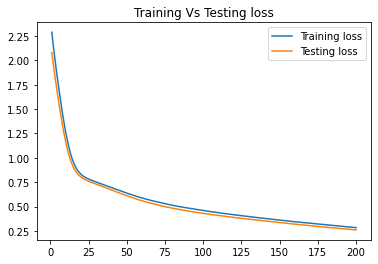

In [ ]:
plt.plot(res['Epochs'],res['loss'],label='Training loss')
plt.plot(res['Epochs'],res['val_loss'],label='Testing loss')
plt.title('Training Vs Testing loss')
plt.legend()
plt.show()

In [ ]:
y_pred=mod.predict(x_test)
y_pred[:5]

array([[2.3604942e-02, 5.9096771e-01, 3.8542730e-01],
       [2.0552060e-02, 6.2766439e-01, 3.5178348e-01],
       [9.9033362e-01, 9.2915613e-03, 3.7487189e-04],
       [2.9005997e-03, 3.2853317e-01, 6.6856629e-01],
       [1.2635095e-01, 6.9087452e-01, 1.8277451e-01]], dtype=float32)

In [ ]:
y_pred=y_pred.argmax(axis=1)
y_pred[:5]

array([1, 1, 0, 2, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

